# HW1111Q3 CH06Q08

### 8. In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

##### (a) Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector e of length n = 100.

In [1]:
import numpy as np

np.random.seed(0)
n = 100
X = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 1, n)

##### (b) Generate a response vector Y of length n = 100 according to the model Y = β0 + β1X + β2X^2 + β3X^3 + e, where β0, β1, β2, and β3 are constants of your choice.

In [2]:
beta_0, beta_1, beta_2, beta_3 = 1, 0.5, -0.3, 0.2

Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

##### (c) Use forward stepwise selection in order to select a model containing the predictors X, X2,...,X10. What is the model obtained according to Cp? Report the coefcients of the model obtained.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

X_poly = np.column_stack([X**i for i in range(1, 11)])

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", scoring="neg_mean_squared_error", cv=5)
sfs.fit(X_poly, Y)

selected_features_forward = sfs.get_support()

model.fit(X_poly[:, selected_features_forward], Y)
coefficients = model.coef_
intercept = model.intercept_

print("Selected features (forward):", selected_features_forward)
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Selected features (forward): [ True  True  True  True False False False False False  True]
Intercept: 1.2387612326414417
Coefficients: [ 6.19227886e-01 -6.06673775e-01  2.05776437e-01  5.36204065e-02
  5.87283041e-06]


##### (d) Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [4]:
sfs_backward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="backward", scoring="neg_mean_squared_error", cv=5)
sfs_backward.fit(X_poly, Y)

selected_features_backward = sfs_backward.get_support()

model.fit(X_poly[:, selected_features_backward], Y)
coefficients_backward = model.coef_
intercept_backward = model.intercept_

print("Selected features (backward):", selected_features_backward)
print("Intercept (backward):", intercept_backward)
print("Coefficients (backward):", coefficients_backward)

print("\nTwo methods choose different features for the model.")

Selected features (backward): [False  True  True  True  True False False False  True False]
Intercept (backward): 1.2647143863751547
Coefficients (backward): [-0.69813045  1.07597157  0.08896082 -0.23635425  0.00290142]

Two methods choose different features for the model.


##### (e) Now fit a lasso model to the simulated data, again using X, X2, ...,X10 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained.

C:\Users\Chang Hung Cheng\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02577383985800452, tolerance: 0.021183870061496583
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Chang Hung Cheng\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028429862107117287, tolerance: 0.021183870061496583
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Chang Hung Cheng\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02965531631724616, tolerance: 0.021183870061496583
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Chang Hung Cheng\anaconda3\Lib\site-

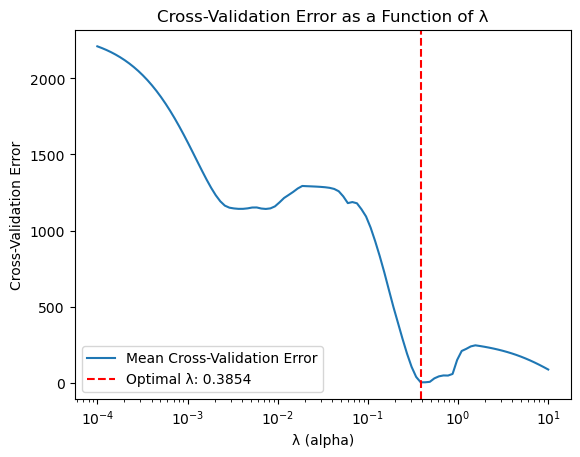

Optimal λ (alpha): 0.38535285937105274
Lasso Coefficients: [ 0.         -0.          0.         -0.          0.17083813 -0.03363129
  0.         -0.         -0.00351772  0.00047408]


In [5]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=0)
lasso_cv.fit(X_poly, Y)

plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), label="Mean Cross-Validation Error")
plt.xscale("log")
plt.xlabel("λ (alpha)")
plt.ylabel("Cross-Validation Error")
plt.title("Cross-Validation Error as a Function of λ")
plt.axvline(lasso_cv.alpha_, color="red", linestyle="--", label=f"Optimal λ: {lasso_cv.alpha_:.4f}")
plt.legend()
plt.show()

lasso_coefficients = lasso_cv.coef_
print("Optimal λ (alpha):", lasso_cv.alpha_)
print("Lasso Coefficients:", lasso_coefficients)

##### (f) Now generate a response vector Y according to the model Y = β0 + β7X^7 + e, and perform forward stepwise selection and the lasso. Discuss the results obtained.

In [6]:
beta_0_new = 1
beta_7_new = 2
Y_new = beta_0_new + beta_7_new * X**7 + epsilon 

sfs_forward_new = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", scoring="neg_mean_squared_error", cv=5)
sfs_forward_new.fit(X_poly, Y_new)
selected_features_forward_new = sfs_forward_new.get_support()

print("Selected features (forward selection):", selected_features_forward_new)

lasso_cv_new = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=0)
lasso_cv_new.fit(X_poly, Y_new)
lasso_coefficients_new = lasso_cv_new.coef_

print("Optimal λ (alpha):", lasso_cv_new.alpha_)
print("Lasso Coefficients:", lasso_coefficients_new)

print("\nThe only significant predictor variable in the forward stepwise selection is X^7.")
print("It is possible that the noise affected the Lasso model, preventing it from accurately selecting 𝑋^7 as the most important variable.")


Selected features (forward selection): [ True  True  True  True False False  True False False False]
Optimal λ (alpha): 0.12045035402587824
Lasso Coefficients: [-0.         -0.         -1.75411383  0.05641281  2.67258233 -0.04128383
  1.02942663 -0.01088742  0.09795125  0.00464488]

The only significant predictor variable in the forward stepwise selection is X^7.
It is possible that the noise affected the Lasso model, preventing it from accurately selecting 𝑋^7 as the most important variable.
